<a href="https://colab.research.google.com/github/Ryu4824/code-states/blob/main/Sprint3_Mini_Project_(10%E1%84%8C%E1%85%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sprint 3 Mini Project**


## Sprint 학습 목표

- 선형대수의 기본 개념(scalar, vector, matrix)과 그 필요성을 이해할 수 있다.
- 머신러닝의 지도학습과 비지도학습의 차이점을 이해할 수 있다.
  - 비지도학습의 종류인 차원축소와 클러스터링을 목적에 맞게 진행할 수 있다.

## Project 문제 정의

### 배경

> 여러분은 국제 NGO 기구에서 데이터 분석 업무를 담당하고 있습니다. 현재 해당 NGO에서는 확보한 자금을 효과적으로 사용하기 위해 논의 중입니다. 진행 중인 의사결정 중 가장 중요한 것은 **가장 도움이 필요한 국가**를 선정하는 것입니다. 따라서 여러분은 주어진 데이터의 국가들의 기본 건강 정보 및 사회적 경제적 정보를 바탕으로 국가 내의 발전 정도를 파악하여, 어느 국가에 가장 먼저 도움을 줄 것인지에 대한 인사이트를 도출하는 업무를 맡게 되었습니다.

### Project 목표

- 국가별로 전반적인 소득, 생활, 경제 상황을 확인하고 군집화를 수행한다.
- 어떤 국가에 우선적으로 집중하여 자금을 줄 것인지에 대한 인사이트를 도출한다. 

## **N131 - Linear Algebra**

### 오늘의 목표
- Vector, Matrix 연산을 통해 필요한 정보를 도출할 수 있다.
- 선형 독립과 선형 종속의 의미를 이해할 수 있다.


### `Topic 1`: 데이터셋 전처리
> 본격적으로 Project를 진행하기 위해 데이터셋을 불러와 전처리를 진행해봅시다.

<br>

🚨 **data description**

- `country`: 국가명

- `child_mort`: 5세 미만 영유아 사망률 (1000명 당)

- `exports`: 전체 GDP 대비 수출 비율 (상품 및 서비스)

- `health`: 전체 GDP 대비 의료 관련 총 소비율

- `imports`: 전체 GDP 대비 수입 비율 (상품 및 서비스)

- `Income`: 1인당 순 이익

- `Inflation`: 인플레이션율

- `life_expec`: 기대수명

- `total_fer`: 합계출산율

- `gdpp`: 1인당 GDP




#### **1-1. pandas의 `read_csv` 함수를 활용하여 주어진 csv 파일을 `aid`라는 이름으로 불러오세요.**

In [ ]:
import pandas as pd
aid = pd.read_csv("country.csv")

#### **1-2. `aid`에 대해 품질의 문제와 구조적 문제가 있는지 확인 후 있다면 해결하세요.**

In [ ]:
aid.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
aid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
aid["child_mort"].sort_values()

68       2.6
91       2.8
133      2.8
53       3.0
144      3.0
       ...  
97     137.0
31     149.0
32     150.0
132    160.0
66     208.0
Name: child_mort, Length: 167, dtype: float64

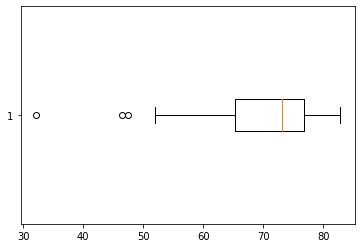

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.boxplot(aid['life_expec'], vert = 0)
plt.show()

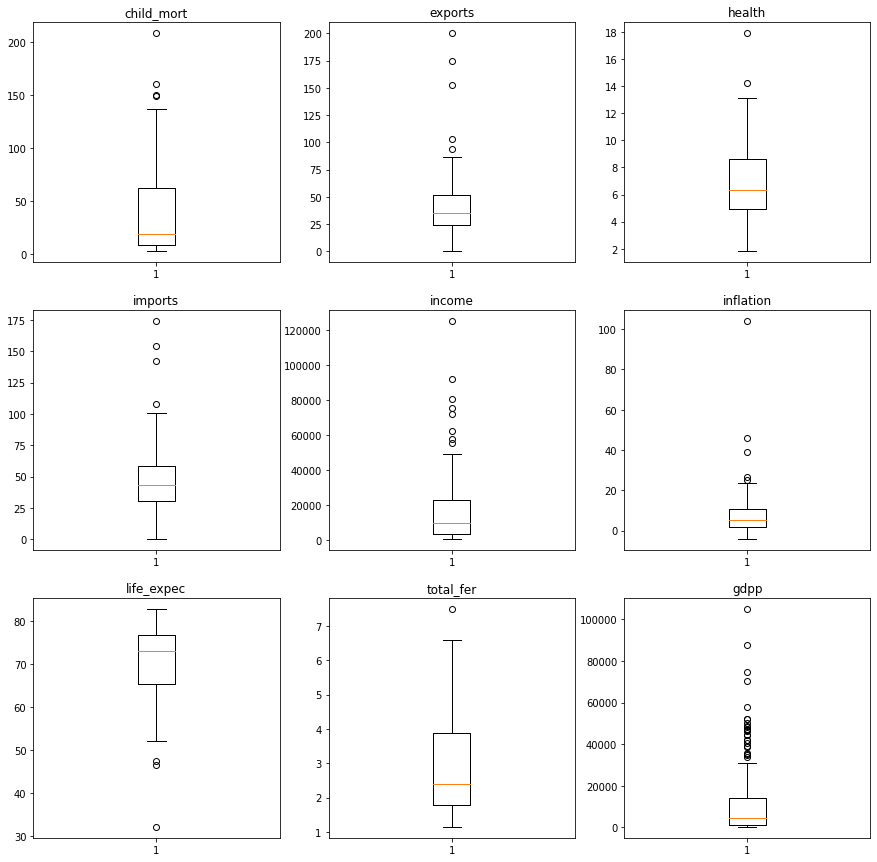

In [ ]:
df_columns = aid.columns

i = 1
fig, axs = plt.subplots(3,3, figsize = (15,15))

for j in range(3):
  for k in range(3):
    axs[j,k].boxplot(aid[df_columns[i]])
    axs[j,k].set_title(df_columns[i])
    i += 1

plt.show()

In [ ]:
aid_clean = aid.copy()
aid_clean["life_expec"] = aid_clean["life_expec"].map(lambda x: x if x > 50 else aid_clean["life_expec"].median())

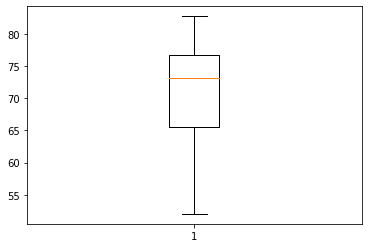

In [ ]:
plt.boxplot(aid_clean["life_expec"]);

In [ ]:
aid_clean.sort_values("inflation")

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400
...,...,...,...,...,...,...,...,...,...,...
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.900,60.9,5.21,17100
149,Timor-Leste,62.6,2.2,9.12,27.8,1850,26.500,71.1,6.23,3600
103,Mongolia,26.1,46.7,5.44,56.7,7710,39.200,66.2,2.64,2650
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.900,75.4,2.47,13500


In [ ]:
aid_clean.loc[113,"inflation"] = 21.34
aid_clean.loc[113,"inflation"]

21.34

1. life_expec 칼럼에서 이상치를 중간값으로 대체

2. Nigeria, inflation에서 이상치 104.000을 21.34로 대체체

### `Topic 2`: Vector & Matrix 연산
> 위에서 전처리를 마친 `aid`를 활용하여 연산을 진행해봅시다.



#### **2-1. 좌표 평면 상에서 3 국가 간의 거리를 측정하여 어떤 국가 간의 거리가 가장 짧은지 구해보세요.**
- `aid` 내 index가 2,4,6인 국가를 추출하세요.
- 해당 국가들의 데이터를 가지고 exports와 imports를 각각 x축, y축으로 하는 scatterplot을 그려보세요.
- 국가들 간의 거리를 Vector의 길이 공식을 활용하여 계산해보세요.
  - $||v|| = \sqrt{a^2 + b^2 + c^2 + \cdots}$

In [ ]:
aid_246 = aid.loc[[2,4,6], ["country", "exports", "imports"]]

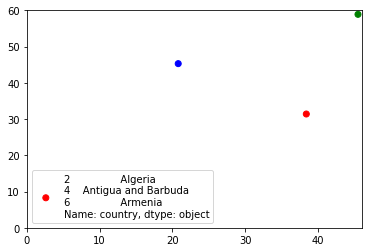

In [ ]:
plt.scatter(aid_246["exports"], aid_246["imports"], color=["red", "green", "blue"], label=aid_246["country"])
plt.xlim(0,46)
plt.ylim(0,60)
plt.legend();

In [ ]:
import numpy as np

In [ ]:
array1 = np.array(aid_246[["exports", "imports"]])
array1

array([[38.4, 31.4],
       [45.5, 58.9],
       [20.8, 45.3]])

In [ ]:
exports = np.array(aid_246['exports'])
imports = np.array(aid_246['imports'])
Alg = np.stack((exports[0], imports[0]), axis=0)
Ant = np.stack((exports[1], imports[1]), axis=0)
Arm = np.stack((exports[2], imports[2]), axis=0)
print(Alg)
print(Ant)
print(Arm)

[38.4 31.4]
[45.5 58.9]
[20.8 45.3]


In [ ]:
import math

In [ ]:
Algd = math.sqrt(Alg[0] ** 2 + Alg[1] ** 2)
Antd = math.sqrt(Ant[0] ** 2 + Ant[1] ** 2)
Armd = math.sqrt(Arm[0] ** 2 + Arm[1] ** 2)
Algd, Antd, Armd

(49.60362889950694, 74.42754866311265, 49.8470661122598)

원점에서부터 거리 짧은 순: Algeria, Armenia, Antigua and Barbuda

In [ ]:
alg_ant = Alg - Ant
alg_arm = Alg - Arm
ant_arm = Ant - Arm

In [ ]:
alg_antd = math.sqrt(alg_ant[0] ** 2 + alg_ant[1] ** 2)
alg_armd = math.sqrt(alg_arm[0] ** 2 + alg_arm[1] ** 2)
ant_armd = math.sqrt(ant_arm[0] ** 2 + ant_arm[1] ** 2)
alg_antd, alg_armd, ant_armd

(28.401760508813535, 22.426992665089983, 28.196631004430298)

서로 거리가 제일 짧은 나라: Algeria와 Armenia


#### **2-2. 행렬곱을 사용하여 10개 국의 총 임금의 합을 계산해보세요.**
- `aid` 내 index가 0~9인 국가를 추출하세요.
- 해당 국가들의 국민 수는 각각 [10, 20, 30, 20, 10, 50, 30, 20, 10, 40] 이라고 가정한 후, `income`과 국민 수를 활용하여 10개 국 전체의 임금 합을 계산하세요.
- for loop을 사용하여 해당 수식을 구현했을 때와 비교했을 때 어떤 것이 더 효율적인지 확인해보셔도 좋습니다.

In [ ]:
aid_income = aid.loc[0:9, "income"]
aid_income

0     1610
1     9930
2    12900
3     5900
4    19100
5    18700
6     6700
7    41400
8    43200
9    16000
Name: income, dtype: int64

In [ ]:
pop = [10, 20, 30, 20, 10, 50, 30, 20, 10, 40]

In [ ]:
np.dot(aid_income, pop)

3946700

In [ ]:
list1 = []

for idx, i in enumerate(aid_income):
  list1.append(aid_income[idx] * pop[idx])

sum(list1)

3946700

for loop이라는 긴 코드를 작성하지 않아도 되서 np.dot이 더 효율적이다.
np.dot / np.matmul: 브로드캐스팅이 가능. array 형태이면 알아서 계산해준다.

### `Topic 3`: 선형 종속, 선형 독립




#### **3-1. '두 벡터가 선형 종속 관계에 있다' 라는 말이 어떤 의미인지 설명해보세요.**
- 선형 종속과 선형 독립의 의미를 생각해보세요.
- 선형 종속인 두 벡터를 2차원 평면에 나타내면 어떻게 표현이 되는지, 시각화를 통해 이해해보셔도 좋습니다.

선형종속이면 두 개의 벡터가 필요 없다. 왜냐하면 선 상의 하나의 벡터로 나머지 하나를 포함한 다른 어떤 벡터도 표현할 수 있기 때문이다.

선형독립:
*   두 개의 벡터로 평면을 만들 수 있고, 세 개의 벡터로 3D를 만들 수 있을 때의 벡터가 서로 독립이다.
*   벡터 수와 차원이 일치하는 경우.



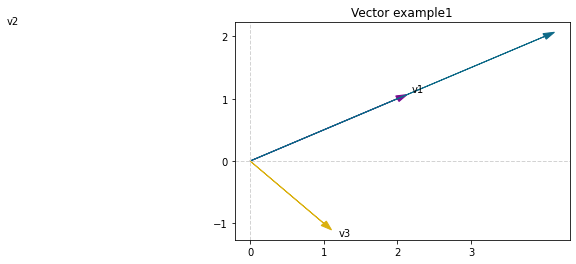

In [ ]:
v1 = [2, 1]
v2 = [4, 2]
v3 = [1, -1]

plt.xticks(np.arange(-4, 4))
plt.yticks(np.arange(-2, 4))

plt.axhline(0, 0, 1, color='lightgray', linestyle='--', linewidth=1)
plt.axvline(0, 0, 1, color='lightgray', linestyle='--', linewidth=1)
plt.arrow(0, 0, v1[0], v1[1], head_width=0.1, color='#790D90')
plt.text(2.2, 1.1, 'v1')
plt.arrow(0, 0, v2[0], v2[1], head_width=0.1, color='#0E6A88')
plt.text(-3.3, 2.2, 'v2')
plt.arrow(0, 0, v3[0], v3[1], head_width=0.1, color='#DAB00F')
plt.text(1.2, -1.2, 'v3')
plt.title('Vector example1')
plt.show()

위 그래프에서 보라색 벡터를 늘려서 파란색 벡터로 만들거나, 파란색 벡터를 줄여서 보라색 벡터로 만들 수 있지만, 노란색 벡터는 만들 수 없다.

(1,3), (2,6)은 서로 선형 종속.

역행렬 A A^-1 = I
[1 0
 0 1]

## **N132 - PCA**

### 오늘의 목표
- feature 간 상관관계를 확인하여 연관성 높은 feature가 무엇인지 제시할 수 있다.
- 차원 축소의 목적과 PCA에 대해 이해할 수 있다.
- PCA를 활용하여 feature의 개수를 줄일 수 있다.

### `Topic 1`: 차원 축소와 PCA에 대해 설명하기
> 차원 축소의 목적과 종류에 대해 정리하고, Feature Extraction 방법인 PCA의 작동원리에 대해 설명해보세요.



In [ ]:
# 데이터의 스케일에 따라 주성분으로 설명 가능한 분산량이 달라질 수 있기 때문
# 차원이 크면 헤를 구하기 위한 방정식이 많아진다.
# column이 많아지면 모델링 시간 증가 분산이 크면 그래프가 완만하고 넓다. 이는 일관되지 못하다는 인식을 줄 수 있음
# 4차원 이상은 인간이 볼 수 없는 차원이라 시각화가 어렵다

### `Topic 2`: 특성 간 연관성 파악
> 우리에게 주어진 총 10개의 feature 들은 서로 어떤 연관성을 가지고 있을까요? <br>
> heatmap을 활용하여 feature 별 연관도를 시각적으로 나타내보세요.

#### **2-1. 연관성이 높은 feature는 어떤 것이 있나요?**
- heatmap을 통해 feature 간 상관관계를 나타내보세요.
- 연관성이 높다의 기준을 0.8로 볼 때, 연관성이 높은 feature에는 어떤 것이 있는지 정리하세요.
- 해당 feature 간의 연관성이 높은 이유가 무엇인지 함께 찾아보세요.

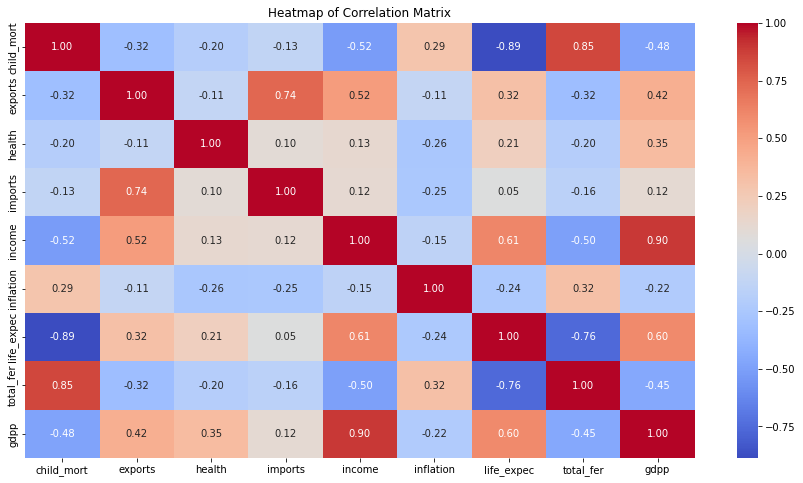

In [ ]:
# corr(): 데이터프레임 내의 모든 feature 쌍 간의 상관관계 계산
corr = aid.corr()

# heatmap 그리기
plt.figure(figsize=(15,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()

country: 국가명

child_mort: 5세 미만 영유아 사망률 (1000명 당)

exports: 전체 GDP 대비 수출 비율 (상품 및 서비스)

health: 전체 GDP 대비 의료 관련 총 소비율

imports: 전체 GDP 대비 수입 비율 (상품 및 서비스)

Income: 1인당 순 이익

Inflation: 인플레이션율

life_expec: 기대수명

total_fer: 합계출산율

gdpp: 1인당 GDP

In [ ]:
corr.stack().reset_index().rename(columns={0:"value"}).query('(value>=0.8 | value<=-0.8) & level_0 != level_1')

,level_0,level_1,value
6,child_mort,life_expec,-0.886676
7,child_mort,total_fer,0.848478
44,income,gdpp,0.895571
54,life_expec,child_mort,-0.886676
63,total_fer,child_mort,0.848478
76,gdpp,income,0.895571


child_mort	total_fer	: 합계출산율이 높을수록 영유아 사망률도 높아진다. </br>
income	gdpp : 1인당 순 이익이 높을수록 GDP가 높아진다.</br>
child_mort	life_expec : 

### `Topic 3`: PCA
> PCA를 통해 데이터의 정보를 최대한 보존하면서 차원을 축소하는 과정을 진행해봅시다.

#### **3-1. 데이터 표준화를 진행하세요.**
- sklearn의 StandardScaler를 활용하여 표준화를 진행하세요.
- 표준화를 진행하는 목적이 무엇인지 함께 생각해보세요.

In [ ]:
country = aid.country

In [ ]:
aid_pca = aid.iloc[:,1:10]
aid_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# StandardScaler()를 사용하여 데이터 표준화 
scaler = StandardScaler()
Z = scaler.fit_transform(aid_pca)

# 표준화한 데이터에 대하여 pca 시행 
pca = PCA(n_components='mle') 

B = pca.fit_transform(Z)
B

array([[-2.91302459,  0.09562058, -0.7181185 ,  1.00525464, -0.15831004,
        -0.25459744],
       [ 0.42991133, -0.58815567, -0.3334855 , -1.16105859,  0.17467732,
         0.08457863],
       [-0.28522508, -0.45517441,  1.22150481, -0.8681145 ,  0.15647465,
        -0.4016955 ],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, -1.07409791,  1.17608067,
         0.05160677],
       [-1.88745106, -0.10945301,  1.10975159,  0.05625677,  0.61836532,
        -0.54091719],
       [-2.86406392,  0.48599799,  0.22316658,  0.81636436, -0.27406773,
         0.20137816]])

#### **3-2. 70%의 분산(정보)을 보존하기 위해서는 몇 개의 PC로 차원 축소를 진행해야 하나요?**
- sklearn의 PCA를 사용해보세요.
  - PC 파라미터의 값은 자유롭게 지정해보세요.
- 각 PC 별로 얼만큼의 정보를 가지고 있는지를 나타내는 scree plot을 그려보세요.

In [ ]:
ratio = pca.explained_variance_ratio_
ratio

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235])

In [ ]:
# 분산 비율 
ratio_sum = np.cumsum(pca.explained_variance_ratio_)
ratio_sum

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
       0.97015232])

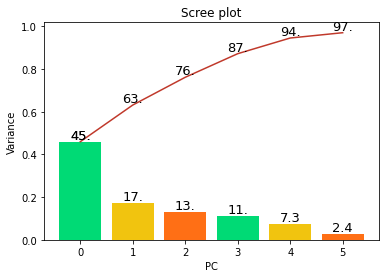

In [ ]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
        ax.annotate(r"%s" % ((str(cumvals[i]*100)[:3])), (ind[i], cumvals[i]), va = "bottom", ha = "center", fontsize = 13)
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
  
scree_plot(pca)

### **Conclusion**
* `2-1`에서 feature 간의 연관성이 높은 컬럼들의 특징은 무엇이었나요?

> 상관관계에 있는 컬럼들의 값이 정비례된다.

* `3-2`에서 몇 개의 PC로 차원 축소를 진행하는게 좋다고 판단하셨나요?

> 70%기준으로 3차원으로 축소하는 것이 좋다.



## **N133 - Clustering**

### 오늘의 목표
- PCA 결과를 바탕으로 Clustering을 진행할 수 있다.
- 우선순위를 어떻게 정의할 것인지에 대해 우리 조의 의견을 정리할 수 있다.
- Clustering 결과로 도출된 Cluster 중 어떤 Cluster를 가장 우선순위로 둘 것인지에 대한 비지니스 인사이트를 도출할 수 있다.

### `Topic 1`: Clustering

In [ ]:
# 패키지 준비
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# 원본 데이터
aid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
# pca 결과, 3차원으로 데이터를 축소한 후 Clustering을 수행
aid_pc = pd.DataFrame(B)
aid_pc.columns = ['pc1', 'pc2', 'pc3',' pc4','pc5','pc6']
aid_pc = aid_pc.iloc[ : ,:3]
aid_pc

,pc1,pc2,pc3
0,-2.913025,0.095621,-0.718118
1,0.429911,-0.588156,-0.333486
2,-0.285225,-0.455174,1.221505
3,-2.932423,1.695555,1.525044
4,1.033576,0.136659,-0.225721
...,...,...,...
162,-0.820631,0.639570,-0.389923
163,-0.551036,-1.233886,3.101350
164,0.498524,1.390744,-0.238526
165,-1.887451,-0.109453,1.109752


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


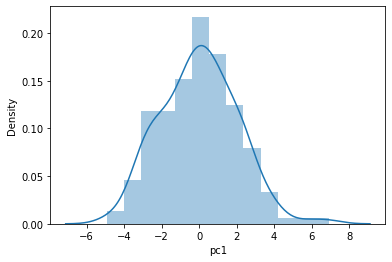

In [ ]:
# 각 주성분들의 분포 확인
sns.distplot(aid_pc.iloc[:,0]);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


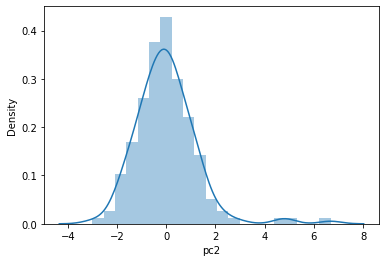

In [ ]:
sns.distplot(aid_pc.iloc[:,1]);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


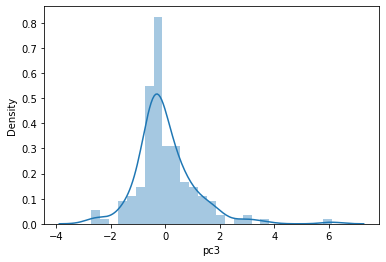

In [ ]:
sns.distplot(aid_pc.iloc[:,2]);

#### **1-1. K-Means Clustering을 진행하세요.**
- sklearn의 k-means 알고리즘을 활용하여 PCA를 통해 도출한 데이터셋에 대해 Clustering을 진행하세요.
- Elbow Method와 여러분의 아이디어를 활용하여 몇 개의 Cluster를 만드는 것이 가장 좋을지 생각해봅시다.

In [ ]:
# Elbow Method를 수행하기 위한 데이터 생성

sse = {}

for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(aid_pc)
  sse[k] = kmeans.inertia_

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

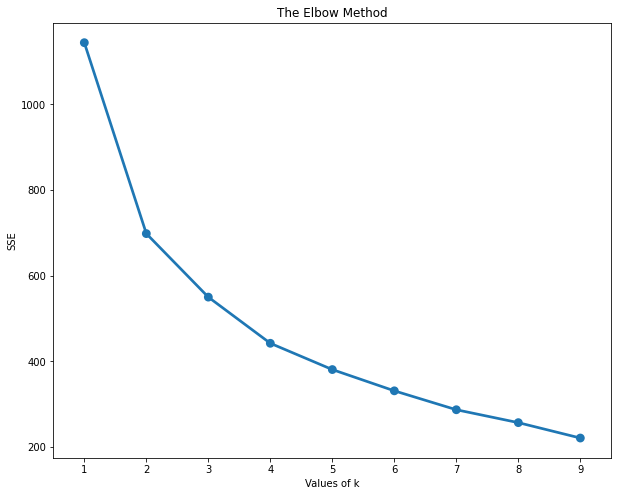

In [ ]:
# 결과 시각화

plt.figure(figsize = (10,8))

plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

- 기울기가 급격히 감소한 부분은 군집 수가 3인 경우, 또는 4인 경우로 의견이 나뉘었으나
- 군집분석 결과 군집별 해석의 용이성을 위해 최적의 군집 수를 3개로 결정하였다.

#### **1-2. 원본 `aid` 데이터셋에 `cluster` column을 추가하세요.**
- Clustering을 통해 군집화된 데이터의 clusterid를 원본 `aid` 데이터프레임에 `cluster` 라는 이름의 column으로 추가하세요.

In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(aid_pc)

clusterid = kmeans.labels_

aid['cluster'] = clusterid

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# 원본 데이터의 군집별 데이터 수
aid.cluster.value_counts()

1    94
0    70
2     3
Name: cluster, dtype: int64

### `Topic 2`: 비지니스 인사이트 도출
> Clustering을 통해 도출한 group 별 특징을 파악하고, 어떤 group을 aid의 우선순위로 둘 것인지 논의해봅시다.

In [ ]:
aid.groupby(['cluster']).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,75.055714,30.768557,6.059857,44.318084,4303.328571,10.927643,62.104286,4.359857,2007.914286
1,11.965957,44.504255,7.379255,45.302128,25210.957447,5.608798,76.502128,1.946596,19699.574468
2,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


#### **2-1. Cluster 별 특징을 파악해봅시다.**
- Cluster 별로 평균 값을 계산해보고 어떤 차이가 있는지 확인해보세요.
- 우선순위는 어떻게 정의하는 것이 좋을지 함께 논의해보세요. <br>
  > 예시)
  - 조금만 도움을 주면 회복할 수 있는 국가
  - 도움을 주지 않으면 상황이 악화될 가능성이 매우 높은 국가


**cluster 0의 경우**
- 유아 사망율이 굉장히 높으며, 인플레이션 수치가 높고, 수익도 가장 적은 등 여러가지 위험요소가 나타나고 있다.
- 따라서 cluster 0에 속하는 국가들을 **`도움을 주지 않으면 상황이 악화될 가능성이 매우 높은 국가`**로 판단하였다.  

**cluster 1의 경우**
- 특정 부분, 예를 들면 수입이나 수출 수입의 비율은 cluster2 집단과 많은 차이를 보이지만  
기대 수명이나 영유아 사망률 같은 경우는 오히려 cluster2와 비슷한 수준을 보이고 있다.
- 따라서 cluster 1에 속하는 국가들을 **`조금만 도움을 주면 회복할 수 있는 국가`**로 판단하였다.  

**cluster 2의 경우**
- cluster 0의 경우와 대조적으로, 유아 사망율도 낮고, 인플레이션 수치도 낮으며, 수익도 높게 나타나고 있다.
- 따라서 cluster 2에 속하는 국가들은 **`도움을 필요로 하지 않는 국가`**로 판단하였다.

#### **2-2. 어떤 Cluster를 우선순위로 지원할 것인지 설명해봅시다.**
- `cluster 0`에 속하는 국가들을 최우선으로 지원하기로 결정했다.
- 이유는 2-1의 답과 동일

### **Conclusion**
> Clustering을 통해 도출한 아래의 질문들에 대한 인사이트를 설명해주세요.
  - 몇 개의 Cluster로 군집화를 진행하는 것이 적절하다고 생각했나요? 그 이유는 무엇인가요?
    - `Elbow Method`를 사용하여 최적의 군집 수를 논의한 결과 기울기가 급격히 감소한 부분은 군집 수가 3인 경우, 또는 4인 경우로 의견이 나뉘었다.
    - 군집분석 결과 군집별 해석의 용이성을 위해 최적의 군집 수를 3개로 결정하였다.
  - Cluster 별로 어떤 특징을 가지고 있나요?  
    - `cluster 0` : 유아 사망율이 굉장히 높으며, 인플레이션 수치가 높고, 수익도 가장 적은 등 여러가지 위험요소가 나타나고 있다.
    - `cluster 1` : 수입이나 수출 수입의 비율은 `cluster 2`와 많은 차이를 보이지만  
기대 수명이나 영유아 사망률 같은 경우는 오히려 `cluster 2`와 비슷한 수준을 보이고 있다.
    - `cluster 2` : 유아 사망율도 낮고, 인플레이션 수치도 낮으며, 수익도 높게 나타나고 있다.
  - 어떤 Cluster에 속해있는 국가들을 우선적으로 지원해야 할까요? 그 이유는 무엇인가요?
    - 위에 나타난 해석처럼 `cluster 0`이 현재 위험요소가 많이 나타나고 있기 때문에 해당 국가들을 지원하기로 결정했다.

### `Bonus 1`: **Log Transformation 수행 목적**  
- 정규분포를 위해 수행할까?
  - 큰 수를 줄이기 위해서도 맞고, 정규분포를 위해서도 맞다.
    - 왜도가 크게 나타나는 데이터 분포의 경우, 특정 값들이 대부분의 데이터와 값 차이가 크게 나타난다.
    - 로그를 취함에 따라 데이터 자체의 크기가 줄어들 뿐만 아니라, 데이터 값의 차이 또한 줄어들기 때문에 정규성이 올라간다.

### `Bonus 2`: **실루엣 계수로 최적의 군집 수 선정하기**
- `Elbow Method`를 눈대중과 해석의 용이성에 따라 판단했기 때문에  
- 또 다른 군집 수 선정 방법인 실루엣 계수로 확인

In [ ]:
# 패키지 준비
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [ ]:
# 데이터 준비 (Elbow Method를 수행했을 때와 동일한 데이터)
x = B[:,:3]

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.34864694523679873


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.37214405726319355


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.29585150747450745


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.29444567689791157


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.3064962103012077


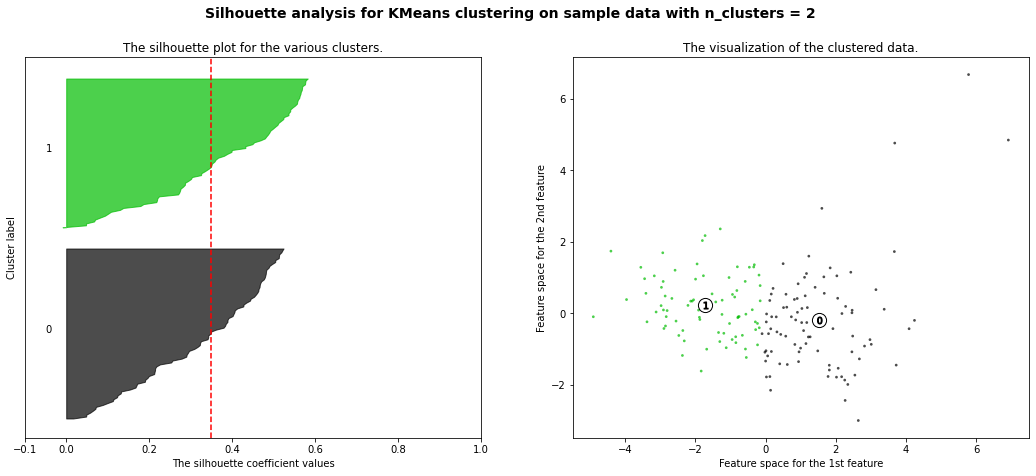

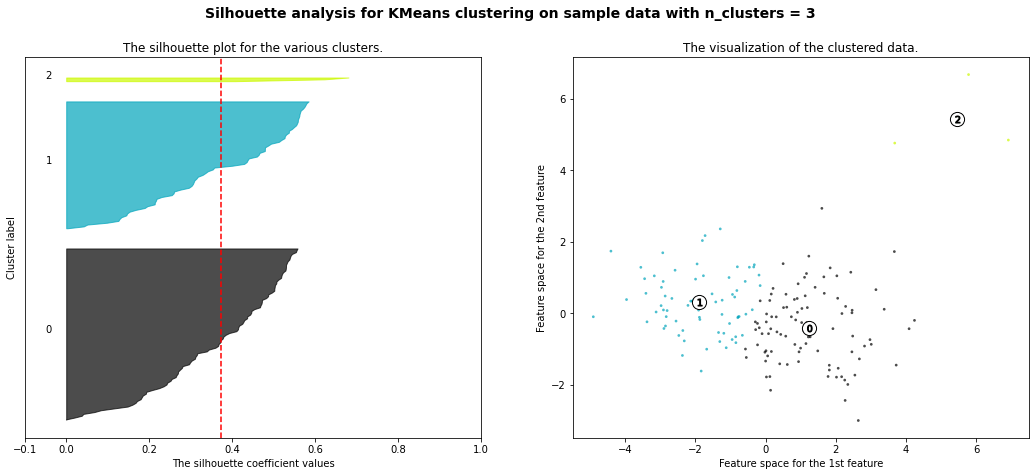

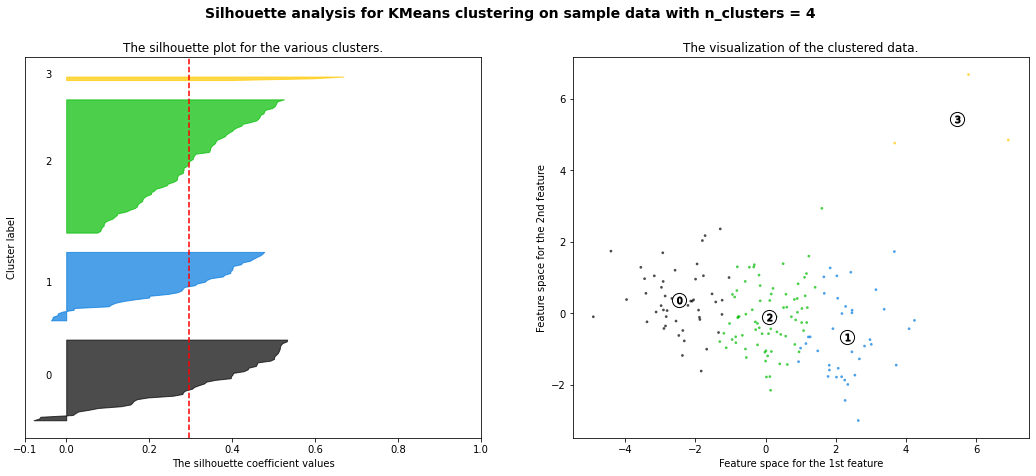

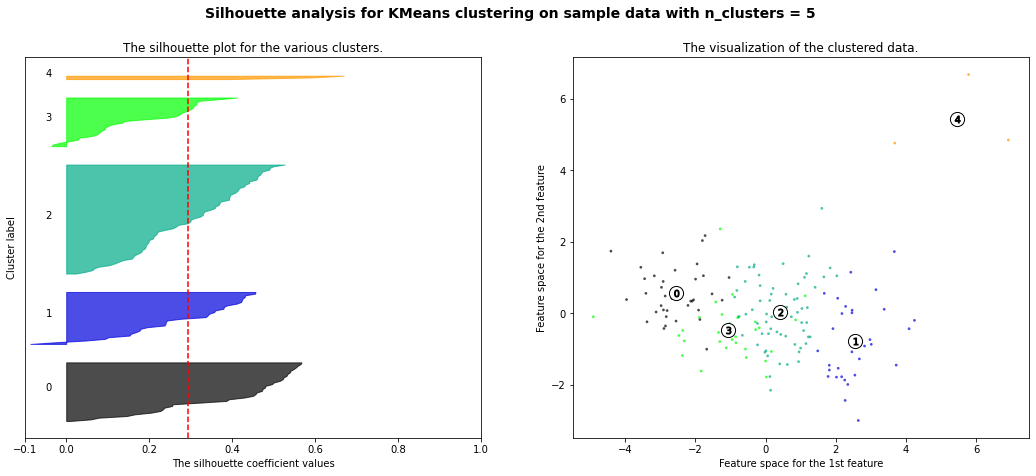

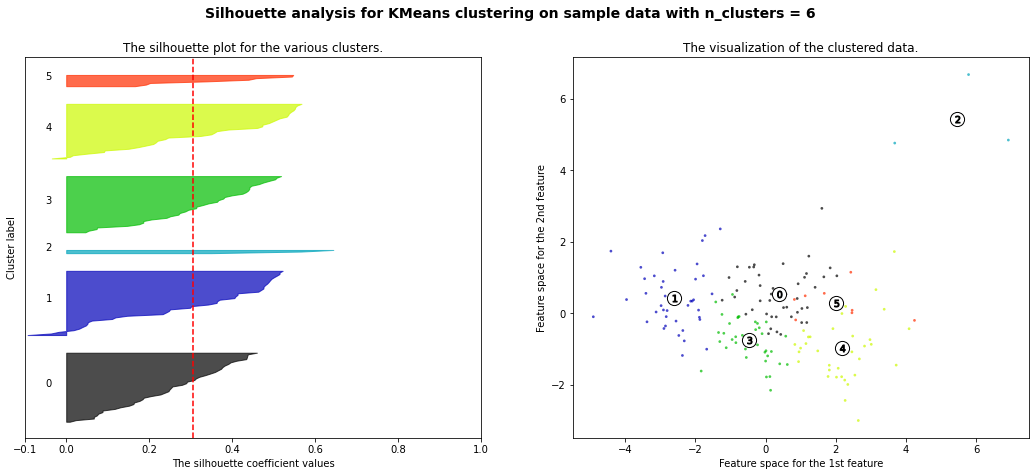

In [ ]:
# Silhouette score

for n_clusters in range(2,7):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, 0], x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# 붉은 선이 실루엣 계수의 평균을 의미

Elbow Method 결과 헷갈렸던 부분은 군집 수를 3개로 할 것인가, 4개로 할 것인가
- 시각화를 바탕으로 해석
  - 군집 수가 3인 경우 데이터를 조금만 보유하는 군집이 생기지만, 이는 `Elbow Method`를 통해 확인했을 때도 동일하게 발생한 문제이기 때문에 일단 넘어갔다.
- 실루엣 계수 바탕으로 해석
  - 군집 수가 3개인 경우 전체 데이터의 실루엣 계수 평균이 가장 높게 나타나기 때문에 군집 수 3개가 적절하다고 판단했다.

참고) 실루엣 계수
- 각 데이터 포인트와 주위 데이터 포인트들과의 거리 계산을 통해 구한 값
- 군집 안에 있는 데이터들은 잘 모여있는지, 군집끼리는 서로 잘 구분되는지 클러스터링을 평가하는 척도
- 구하는 방법 : [일단 보류](https://studying-haeung.tistory.com/10)  
- 실루엣 계수의 평균값이 1에 가까울수록 군집화가 잘 되었다고 생각할 수 있다
- 0에 가까운 경우는, 두 군집 간 거리가 거의 비슷한 경우를 의미하며 잘 구분되지 않은 상태이다.
- -1에 가까운 경우는, 데이터 포인트 `i`가 오히려 이웃 클러스터에 더 가까운 경우를 의미하며 아예 잘못 할당된 상태이며, 실제로는 거의 나타나지 않는다. 


## **N134 - Gradient Descent**

### 오늘의 목표
- 경사하강법에서 미분이 어떻게 활용되는지 이해할 수 있다.
- 경사하강 알고리즘이 언제 사용되는지 이해할 수 있다.
- 머신러닝의 지도학습과 비지도학습을 구분할 수 있다.

### `Topic 1`: 경사하강 알고리즘과 미분

#### **1-1. 경사하강 알고리즘에서 미분이 어떻게 활용되는지 설명해봅시다.**
- 경사하강 알고리즘 내 미분이 하는 역할이 무엇인지 정리해보세요.

### `Topic 2`: 머신러닝 활용

#### **2-1. 여러분이 관심있는 도메인에서 머신러닝이 어떻게 활용되고 있는지 찾아봅시다.**
- 각자 관심있는 도메인이 있다면 해당 도메인에서 어떻게 머신러닝이 활용되고 있는지 찾아보세요.
- 관심있는 도메인이 없다면, 여러분이 평소 즐겨하는 취미, 방문하는 웹 사이트 등에서부터 시작해보셔도 좋습니다.

### **발표 내용**

- N133의 결론을 참고해서 Clustering 결과와 Cluster 간의 특징 차이, 그리고 어떤 국가들을 지원해야할지에 대해 발표해주세요.
- N134에서 정리한 경사하강 알고리즘과 미분의 관계에 대해 여러분들이 이해한 내용을 설명해주세요.